# Assignment No.9

#### Build an XGBoost classification model to predict whether a customer will take the travel package (ProdTaken) using 
#### demographic and marketing features. 
#### The process includes handling missing values (e.g., Age, Income, DurationOfPitch), 
#### encoding categorical variables (Occupation, Gender, TypeofContact, etc.),
#### feature engineering, and balancing class distribution.
#### The model will be trained and evaluated using AUC-ROC and F1 score to ensure robust prediction of customer decisions.

#### Name: Wavhal Prathmesh Navnath 
#### Roll No:23107137
#### Class :  TY-B



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
df = pd.read_csv("C:/Users/prath/Downloads/Travel.csv")

# Handellling Missing Values

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender']= df['Gender'].replace("Fe Male","Female")
df['MaritalStatus']= df['MaritalStatus'].replace("Single","Unmarried")

In [6]:
## Checking Missing Values
## these are NaN values
na_values = [features for features in df.columns if df[features].isnull().sum() >=1]
for feature in na_values:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing Values')

Age 4.62357 % missing Values
TypeofContact 0.51146 % missing Values
DurationOfPitch 5.13502 % missing Values
NumberOfFollowups 0.92062 % missing Values
PreferredPropertyStar 0.53191 % missing Values
NumberOfTrips 2.86416 % missing Values
NumberOfChildrenVisiting 1.35025 % missing Values
MonthlyIncome 4.76678 % missing Values


In [7]:
df[na_values].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [8]:
df.Age.fillna(df.Age.median(),inplace = True)

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\2067532558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace = True)


In [9]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace = True)

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\1271724004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace = True)


In [10]:
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\1100695732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)


In [11]:
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace = True)   ## for the categorical features use the mode

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\821710093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace = True)   ## for the categorical features use the mode


In [12]:
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace = True)

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\4219815442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace = True)


In [13]:
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)  # here no values

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\610309013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)  # here no values


In [14]:
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\3127042307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)


In [15]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

C:\Users\prath\AppData\Local\Temp\ipykernel_1252\3937586248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
# cust id is not imp so remove it
df.drop('CustomerID',inplace=True,axis=1)

### Feature Engineering


In [20]:
### create new column
df['Total_Visiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True,axis=1)

In [21]:
## get all numeric featuers
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features :",len(num_features))

Numerical Features : 12


In [22]:
# categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical Features are:",len(cat_features))

Categorical Features are: 6


In [23]:
## Discrete Features       ## more no. of the categories more than 10
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]   ## here feature with less than 25 category
print("Num of the Dis :",len(dis_features))

Num of the Dis : 9


In [24]:
## Continuos features
cont_features = [feature for feature in num_features if feature not in dis_features]
print("Num of the Dis :",len(cont_features))

Num of the Dis : 3


## MODEL TRAINING 

In [25]:
from sklearn.model_selection import train_test_split
x= df.drop('ProdTaken',axis = 1)
y = df['ProdTaken']

In [26]:
x_train,x_test,y_train,y_test  =train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape ,x_test.shape                                                

((3910, 17), (978, 17))

In [27]:
## Create column transformer with 3 types of transformers
cat_features = x.select_dtypes(include='object').columns
num_features = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocesser = ColumnTransformer(
    [
        ("OneHotencoder",oh_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)       ## combine Both in one it is columntransformer

In [28]:
preprocesser

ColumnTransformer(transformers=[('OneHotencoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total_Visiting'],
      dtype='object'))])

In [29]:
## Apply for the training data (Fit Transform)
x_train = preprocesser.fit_transform(x_train)

In [30]:
x_test = preprocesser.transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score,confusion_matrix,roc_auc_score

In [34]:
models = {
    "Random Forest" :RandomForestClassifier(),
    "Decision tree" :DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "Adaboost Boosting":AdaBoostClassifier(),
    "XgBoost Classifier":XGBClassifier()                   ## we can add any algorithms
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train
    
    ## Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    ## Performance for Y_train(TRAIN)
    model_train_acc = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_roc = roc_auc_score(y_train,y_train_pred)

    ## Performance for y_test(TEST)
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_roc = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("model Performance for the Training Set")
    print(" - Accuracy:{:.4f}".format(model_train_acc))
    print(" - F1 Score:{:.4f}".format(model_train_f1))
          
    print(" - Precision:{:.4f}".format(model_train_precision))
    print(" - Recall:{:.4f}".format(model_train_recall))
    print(" - ROC Score:{:.4f}".format(model_train_roc))

    print("----------------------------------------------")

    print("model Performance for the Testing Set")
    print(" - Accuracy:{:.4f}".format(model_test_acc))
    print(" - F1 Score:{:.4f}".format(model_test_f1))
          
    print(" - Precision:{:.4f}".format(model_test_precision))
    print(" - Recall:{:.4f}".format(model_test_recall))
    print(" - ROC Score:{:.4f}".format(model_test_roc))

    print('='*35)
    print('\n')

    

Random Forest
model Performance for the Training Set
 - Accuracy:0.9997
 - F1 Score:0.9997
 - Precision:1.0000
 - Recall:0.9986
 - ROC Score:0.9993
----------------------------------------------
model Performance for the Testing Set
 - Accuracy:0.9294
 - F1 Score:0.9241
 - Precision:0.9692
 - Recall:0.6597
 - ROC Score:0.8273


Decision tree
model Performance for the Training Set
 - Accuracy:1.0000
 - F1 Score:1.0000
 - Precision:1.0000
 - Recall:1.0000
 - ROC Score:1.0000
----------------------------------------------
model Performance for the Testing Set
 - Accuracy:0.9243
 - F1 Score:0.9240
 - Precision:0.8128
 - Recall:0.7958
 - ROC Score:0.8757


Logistic Regression
model Performance for the Training Set
 - Accuracy:0.8460
 - F1 Score:0.8202
 - Precision:0.7016
 - Recall:0.3032
 - ROC Score:0.6368
----------------------------------------------
model Performance for the Testing Set
 - Accuracy:0.8364
 - F1 Score:0.8087
 - Precision:0.6914
 - Recall:0.2932
 - ROC Score:0.6307


Grad

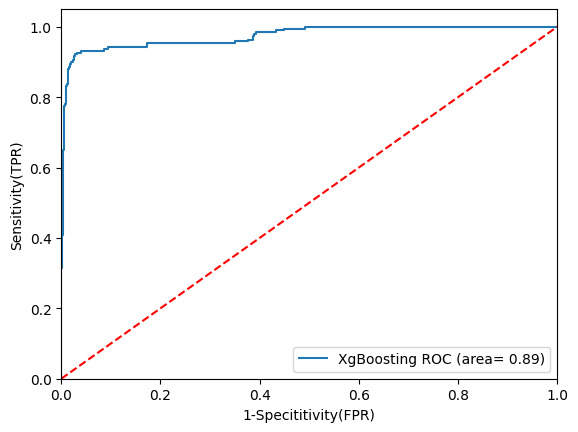

In [48]:
## Plot AUC ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add models to the list that you want to view on ROC
auc_models = [
    {
        'label':'XgBoosting',
        'model':XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.21,colsample_bytree=1),
        'auc': 0.8935
    }]
for algo in auc_models:
    model = algo['model']  # select model
    model.fit(x_train,y_train)

    ## Calculate FPR , TPR
    fpr,tpr,thrs = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    #calculate AUC 
    
    plt.plot(fpr, tpr, label='%s ROC (area= %0.2f)' % (algo['label'], algo['auc']))

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("1-Specititivity(FPR)")
plt.ylabel("Sensitivity(TPR)")
plt.legend(loc = 'lower right')
plt.show()
    